In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
#import zipfile

#local_zip = '/content/drive/MyDrive/archive(20).zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/content/drive/MyDrive/sibi tes')
#zip_ref.close()

In [ ]:
path="/content/drive/MyDrive/DATASET PROYEK AKHIR"

files=os.listdir(path)
files.sort()

df = pd.DataFrame(files)
df

,0
0,A
1,B
2,C
3,D
4,E
5,F
6,G
7,H
8,I
9,K


In [ ]:
image_array=[]
label_array=[]

In [ ]:
for i in tqdm(range(len(files))):
  sub_file=os.listdir(path+"/"+files[i])
  print(len(sub_file))
  for j in range(len(sub_file)):
    file_path=path+"/"+files[i]+"/"+sub_file[j]
    
    image=cv2.imread(file_path)
    image=cv2.resize(image,(96,96))
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image_array.append(image)
    
    label_array.append(i)

  0%|          | 0/24 [00:00<?, ?it/s]

2520


  4%|▍         | 1/24 [01:58<45:14, 118.01s/it]

2520


  8%|▊         | 2/24 [03:07<32:50, 89.57s/it] 

2520


 12%|█▎        | 3/24 [04:17<28:11, 80.53s/it]

2520


 17%|█▋        | 4/24 [05:30<25:55, 77.77s/it]

2520


 21%|██        | 5/24 [06:37<23:17, 73.58s/it]

2520


 25%|██▌       | 6/24 [07:51<22:06, 73.71s/it]

2520


 29%|██▉       | 7/24 [09:00<20:28, 72.28s/it]

2520


 33%|███▎      | 8/24 [10:09<19:01, 71.32s/it]

2520


 38%|███▊      | 9/24 [11:18<17:36, 70.45s/it]

2520


 42%|████▏     | 10/24 [12:31<16:39, 71.40s/it]

2520


 46%|████▌     | 11/24 [13:51<16:00, 73.87s/it]

2520


 50%|█████     | 12/24 [15:01<14:33, 72.79s/it]

2520


 54%|█████▍    | 13/24 [16:09<13:04, 71.36s/it]

2520


 58%|█████▊    | 14/24 [17:19<11:47, 70.78s/it]

2520


 62%|██████▎   | 15/24 [18:26<10:27, 69.72s/it]

2520


 67%|██████▋   | 16/24 [19:38<09:23, 70.38s/it]

2520


 71%|███████   | 17/24 [20:48<08:12, 70.34s/it]

2520


 75%|███████▌  | 18/24 [21:56<06:58, 69.75s/it]

2520


 79%|███████▉  | 19/24 [23:09<05:53, 70.65s/it]

2520


 83%|████████▎ | 20/24 [24:19<04:41, 70.41s/it]

2520


 88%|████████▊ | 21/24 [25:28<03:30, 70.10s/it]

2520


 92%|█████████▏| 22/24 [26:39<02:20, 70.27s/it]

2520


 96%|█████████▌| 23/24 [27:48<01:09, 69.76s/it]

2520


100%|██████████| 24/24 [28:56<00:00, 72.34s/it]


In [ ]:
image_array=np.array(image_array)
label_array=np.array(label_array,dtype="float")
print(image_array)
print(label_array)

[[[[198 199 183]
   [198 199 183]
   [199 200 184]
   ...
   [192 196 188]
   [192 195 187]
   [191 194 185]]

  [[198 199 183]
   [199 200 184]
   [199 200 184]
   ...
   [189 195 185]
   [191 194 185]
   [190 193 184]]

  [[198 199 183]
   [198 199 183]
   [197 198 182]
   ...
   [189 194 184]
   [190 193 182]
   [190 193 182]]

  ...

  [[163 162 144]
   [163 164 148]
   [166 167 151]
   ...
   [ 96  77  73]
   [ 99  80  76]
   [ 98  79  75]]

  [[163 162 144]
   [161 162 146]
   [166 167 151]
   ...
   [ 85  66  62]
   [ 88  69  63]
   [ 89  70  66]]

  [[163 161 146]
   [160 161 145]
   [164 162 147]
   ...
   [ 71  56  50]
   [ 74  56  52]
   [ 74  56  52]]]


 [[[113  64  58]
   [123  70  71]
   [121  72  67]
   ...
   [169 183 186]
   [157 170 176]
   [158 177 181]]

  [[120  69  65]
   [106  58  58]
   [122  67  71]
   ...
   [160 175 180]
   [161 177 176]
   [158 177 180]]

  [[120  72  81]
   [124  67  67]
   [121  70  67]
   ...
   [153 167 170]
   [168 178 187]
   [157 177

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(image_array,label_array,test_size=0.2, random_state=60)

In [ ]:
del image_array,label_array

import gc

gc.collect()


44

In [ ]:
from keras import layers,callbacks,utils,applications,optimizers
from keras.models import Sequential, Model, load_model

model=Sequential()
MobileNetV2=tf.keras.applications.MobileNetV2(input_shape=(96,96,3),include_top=False)

model.add(MobileNetV2)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))
model.build(input_shape=(None,96,96,3))

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
____________________________________________

In [ ]:
!mkdir trained_model

In [ ]:
ckp_path="trained_model/model"

model_checkpoint=tf.keras.callbacks.ModelCheckpoint(
									filepath=ckp_path,
									monitor="val_mae",
									mode="auto",
									save_best_only=True,
									save_weights_only=True)

In [ ]:
reduce_lr=tf.keras.callbacks.ReduceLROnPlateau(
									factor=0.9,
									monitor="val_mae",
									mode="auto",
									cooldown=0,
									patience=5,
									verbose=1,
									min_lr=1e-6)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss="mae",
              metrics=['mae'])

Epochs=500
Batch_Size=512

history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),
                  batch_size=Batch_Size,
                  epochs=Epochs,
                  callbacks=[model_checkpoint,reduce_lr])

Epoch 1/500
95/95 [==============================] - 72s 603ms/step - loss: 2.0221 - mae: 2.0221 - val_loss: 8.5859 - val_mae: 8.5859 - lr: 0.0010
Epoch 2/500
95/95 [==============================] - 55s 580ms/step - loss: 0.9155 - mae: 0.9155 - val_loss: 6.8918 - val_mae: 6.8918 - lr: 0.0010
Epoch 3/500
95/95 [==============================] - 58s 607ms/step - loss: 0.7644 - mae: 0.7644 - val_loss: 5.7915 - val_mae: 5.7915 - lr: 0.0010
Epoch 4/500
95/95 [==============================] - 55s 583ms/step - loss: 0.6603 - mae: 0.6603 - val_loss: 6.8693 - val_mae: 6.8693 - lr: 0.0010
Epoch 5/500
95/95 [==============================] - 55s 578ms/step - loss: 0.6061 - mae: 0.6061 - val_loss: 6.4799 - val_mae: 6.4799 - lr: 0.0010
Epoch 6/500
95/95 [==============================] - 56s 591ms/step - loss: 0.5543 - mae: 0.5543 - val_loss: 6.4722 - val_mae: 6.4722 - lr: 0.0010
Epoch 7/500
95/95 [==============================] - 56s 586ms/step - loss: 0.5095 - mae: 0.5095 - val_loss: 6.8013 - 

1512/1512 [==============================] - 17s 11ms/step - loss: 0.0124 - mae: 0.0124


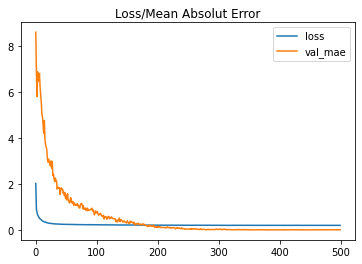

In [ ]:
model.evaluate(X_train, Y_train)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_mae'])
plt.title('Loss/Mean Absolut Error')
plt.legend(['loss','val_mae'],loc='upper right')
plt.show()

In [ ]:
model.load_weights(ckp_path)

In [ ]:
prediction_val=model.predict(X_test,batch_size=16)

print(prediction_val[:24])
print(Y_test[:24])

756/756 [==============================] - 6s 6ms/step
[[ 1.4006961e+01]
 [ 1.1006890e+01]
 [ 1.8005114e+01]
 [ 1.9916337e+00]
 [ 1.1996422e+01]
 [ 1.7999586e+01]
 [ 1.9975662e+00]
 [ 3.9993429e+00]
 [ 1.4003345e+01]
 [ 1.7007315e+01]
 [ 4.0036798e+00]
 [ 1.9994385e+00]
 [ 2.0002850e+01]
 [ 1.5997546e+01]
 [ 1.6991064e+01]
 [ 1.1005290e+01]
 [ 2.0060365e+00]
 [ 9.9883490e+00]
 [ 1.4000932e+01]
 [ 2.0001474e+01]
 [ 7.9994011e+00]
 [-2.3965240e-03]
 [ 2.1989254e+01]
 [ 2.1994133e+01]]
[14. 11. 18.  2. 12. 18.  2.  4. 14. 17.  4.  2. 20. 16. 17. 11.  2. 10.
 14. 20.  8.  0. 22. 22.]


In [ ]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

with open("/content/drive/MyDrive/mobilenetv2.tflite","wb") as f:
	f.write(tflite_model)